<center><h1>AIRBNB CHALLENGE</h1></center>
<center><h2> Where will a new guest book their first travel experience?</h2></center>
<center>*Malo Grisard, Guillaume Jaume, Cyril Pecoraro - EPFL - 15th of January 2017*</center>
<br>
<br>
<center><h2>Main Preprocessing</h2></center>

Pipeline:
    1. Data exploration and cleaning
    2. Machine learning preprocessing
    3. Machine learning optimization
    4. Results
    
*expliquer challenge, reprendre du readme.md*


In [1]:
import pandas as pd
import preprocessing_helper as preprocessing_helper
import matplotlib as plt
% matplotlib inline

## 1. Data exploration and cleaning

The dataset is composed by several files. First, we are going to explore each of them and clean some variables. For a complete explanation of each file, please see the file DATA.md.

### 1.1 file 'train_users_2.csv' and 'test_users.csv'

This file is the most important file in our dataset as it contains the users, information about them and the country of destination.

When a user has booked a travel through Airbnb, the destination country will be specified. Otherwise, 'NDF' will be indicated.

In [2]:
df = pd.read_csv("train_users_2.csv")
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


There are missing values in the columns : 

* date_first_booking : users that never booked an airbnb apartment
* gender : users that didn't wish to specify their gender
* age : users that didn't wish to specify their age
* first_affiliate_tracked : problem of missing data

We wil go each of these variable and take decisions regarding the missing values

In [3]:
df.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
country_destination        False
dtype: bool

#### Ages

There are 2 problems regarding ages in the dataset.

First, many users didn't specify an age.
Also, some users specified thair year of birth instead of age.

For the relevancy of the data we will keep users between the age of 15 and 90 years old, and those who specified their age.
For the others, **we will assign a value of -1**

In [4]:
df = preprocessing_helper.cleanAge(df,'k')

Percentage of users with irrelevant age 1.21 %
Percentage of users with NaN age 41.22 %
All the invalid or missing age were replaced by value -1


The following graph presents the distribution of ages in the dataset. The y scale is in logarithm. Also, the irrelvant ages are represented here, with their value of -1.

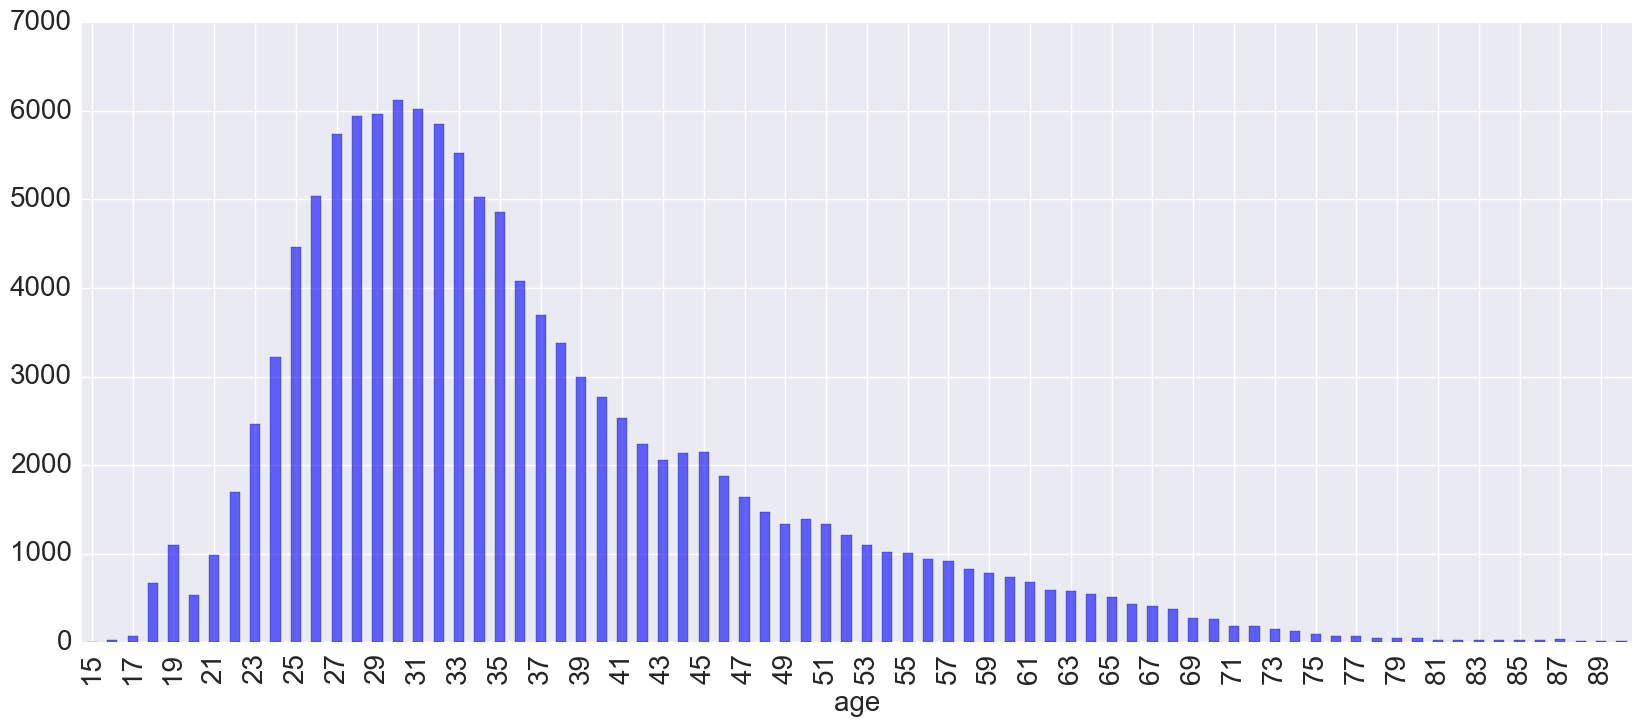

In [5]:
preprocessing_helper.plotAge(df)


### Gender

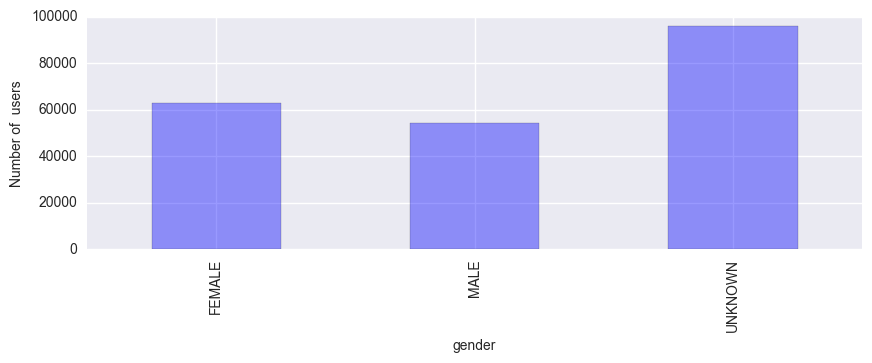

In [6]:
df = preprocessing_helper.cleanGender(df)
preprocessing_helper.plotGender(df)

#### first_affiliate_tracked feature

In [7]:
df = preprocessing_helper.cleanFirst_affiliate_tracked(df)

#### Date_first_booking

- This has a high similarity with the dates where accounts were created. Despite the high growth of airbnb bookings throughout the years, it is possible to see that the difference between the months increases over the years as each year parabol curve increases.
- By studying each year independently, we could see that four peaks arise each month corresponding to a certain day in the week. The following plots will show the **bookings distribution** over the **months** and later over the **week**

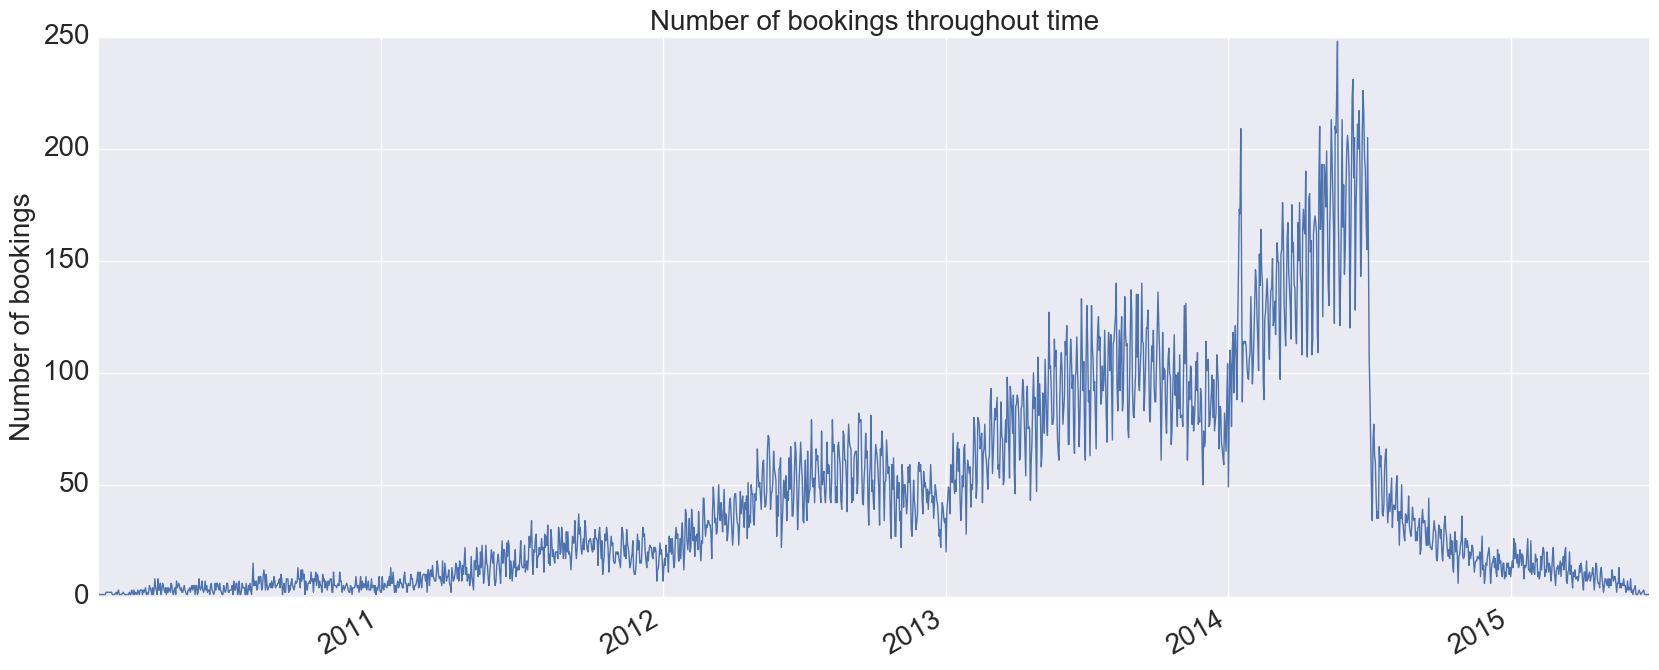

In [8]:
df = preprocessing_helper.cleanDate_First_booking(df)
preprocessing_helper.plotDate_First_booking_years(df)

It is possible to understand from this histogram that the bookings are pretty well spread over the year. Much less bookings are made during november and december and the months of May and June are the ones where users book the most.


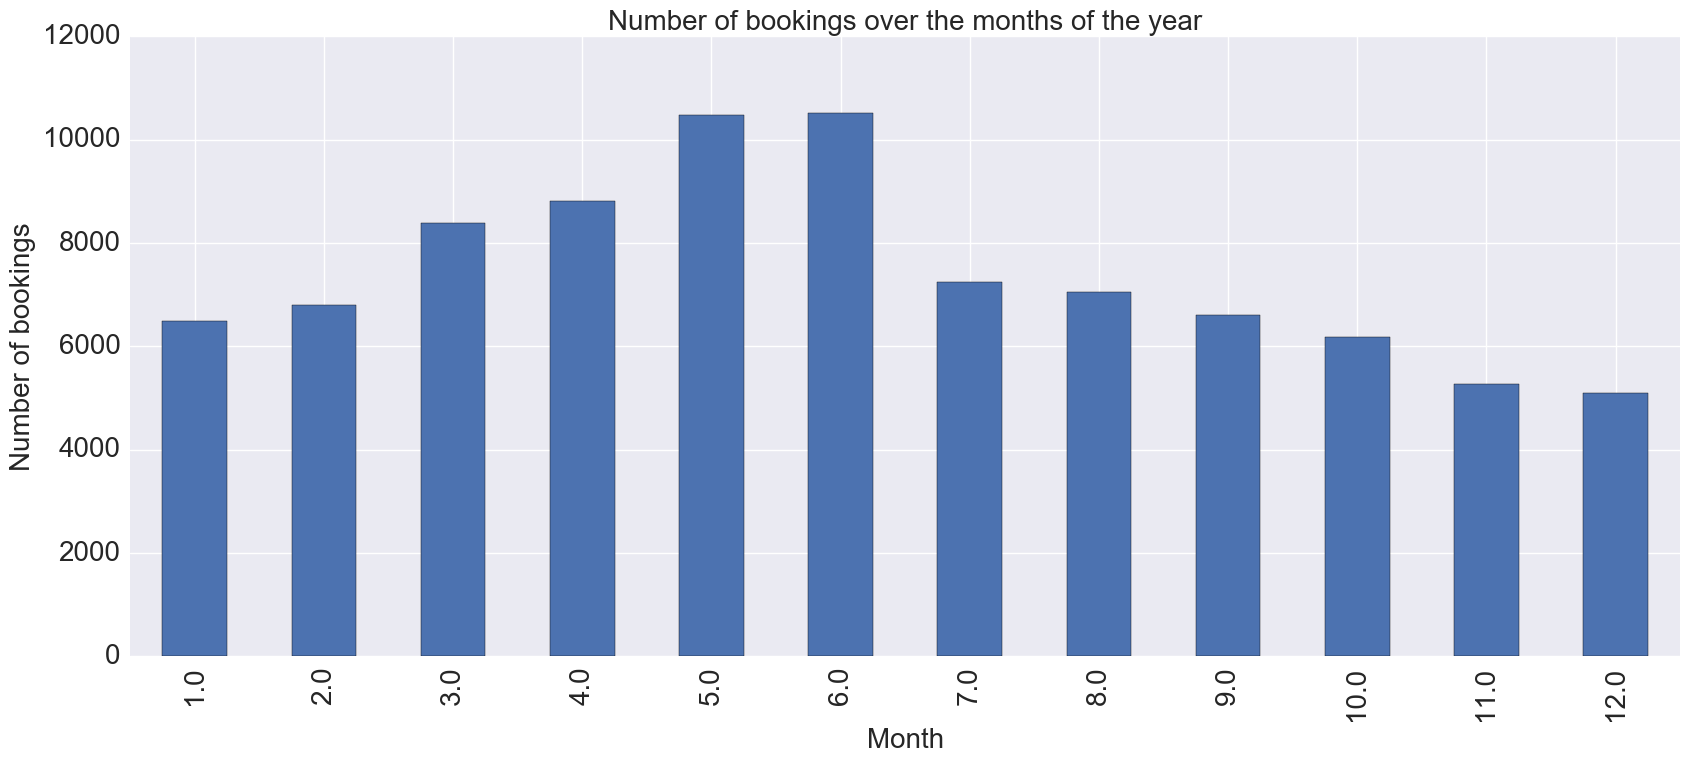

In [9]:
preprocessing_helper.plotDate_First_booking_months(df)

As for the day where most accounts are created, it seems that **tuesday and wednesdays** are the days where people book the most appartments on Airbnb.

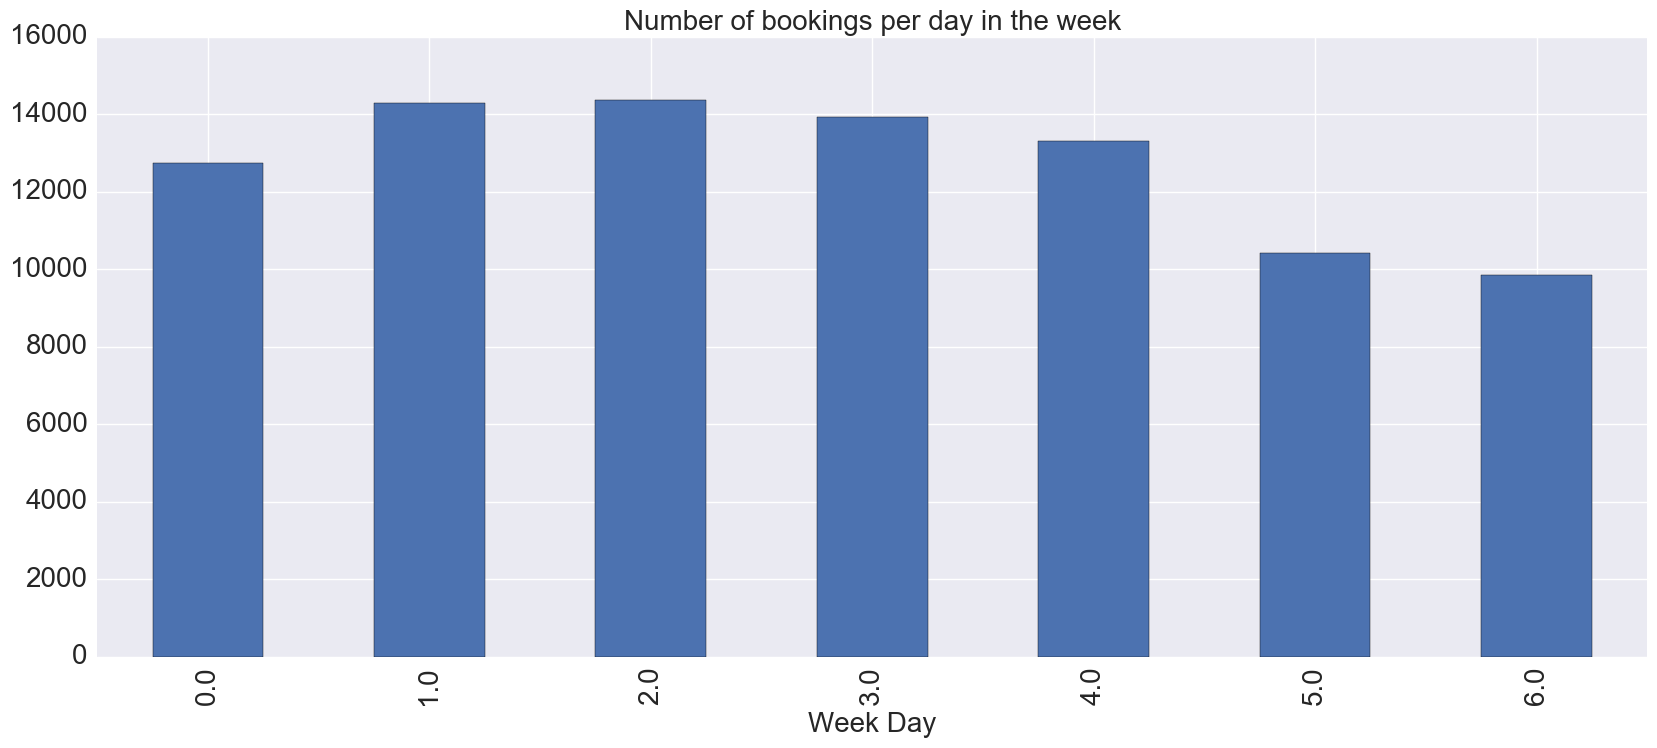

In [10]:
#week = preprocessing_helper.computeDate_First_booking_weekdays(df)
preprocessing_helper.plotDate_First_booking_weekdays(df)

#### Save cleaned and explored file

In [11]:
preprocessing_helper.saveFile(df, 'cleaned_train_user.csv')

file saved


### 1.2 file 'test_user.csv'

This file has a similar structure than train_user_2.csv, so here, we will just do the cleaning process here.

In [12]:
df = pd.read_csv("test_users.csv")
df = preprocessing_helper.cleanAge(df,'k')
df = preprocessing_helper.cleanGender(df)
df = preprocessing_helper.cleanFirst_affiliate_tracked(df)
preprocessing_helper.saveFile(df, 'cleaned_test_user.csv')

Percentage of users with irrelevant age 0.56 %
Percentage of users with NaN age 46.5 %
All the invalid or missing age were replaced by value -1
file saved


### 1.3 file 'countries.csv'

This file presents a summary of the countries presented in the dataset.
This is the signification:
- 'AU' = Australia
- 'ES' = Spain
- 'PT' = Portugal
- 'US' = USA
- 'FR' = France
- 'CA' = Canada
- 'GB' = Great Britain
- 'IT' = Italy
- 'NL' = Netherlands
- 'DE' = Germany
- 'NDF'= No destination found


In [13]:
df = pd.read_csv("countries.csv")
df

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [14]:
df.describe()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000


### 1.4 file 'age_gender_bkts.csv'
This file presents summary statistics of users' age group, gender, country of destination.


In [15]:
df = pd.read_csv("age_gender_bkts.csv")
df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


#### Proportion of travelers given the age group and sex per country
proportion = number of travelers / total travelers in **this** country

We are going to remove ages above 90 and below 15 years old, because they do not make sense for travelers using Airbnb

In [16]:
df = preprocessing_helper.cleanAgeBucket(df)

The following graphs presents the travelers depending on age and sex per country. The y scale is a percentage of travelers in total of travelers in this country. It allows to see that for some country such as Germany, age is really important (the travelers are mostly 50 years old), whereas for some others such as Australia, it doesn't matter. In every country, the oldest travelers are mostly women

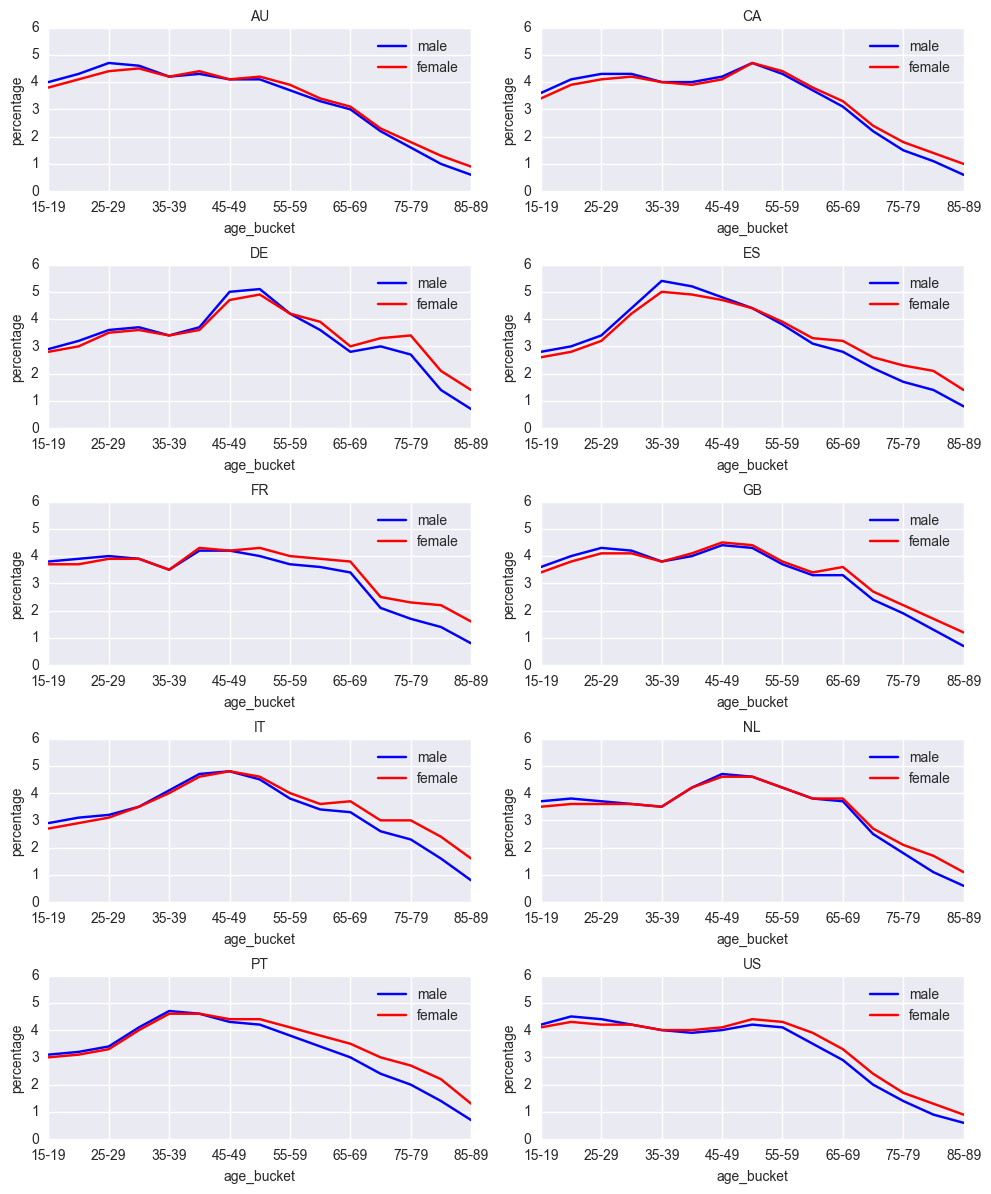

In [17]:
df_destination_age_male,df_destination_age_female,df_destination_total = preprocessing_helper.travellerCountryProcess(df)
preprocessing_helper.travellerProportionCountryPlot(df_destination_age_male,df_destination_age_female)

The following graphs presents the travelers depending on age and sex per country. The y scale is a the number of travelers and they all have the same scale so that countries can be compared between each other. As before, the age is more important for some destination. Also, we can already see that some countries are more populare than some others.

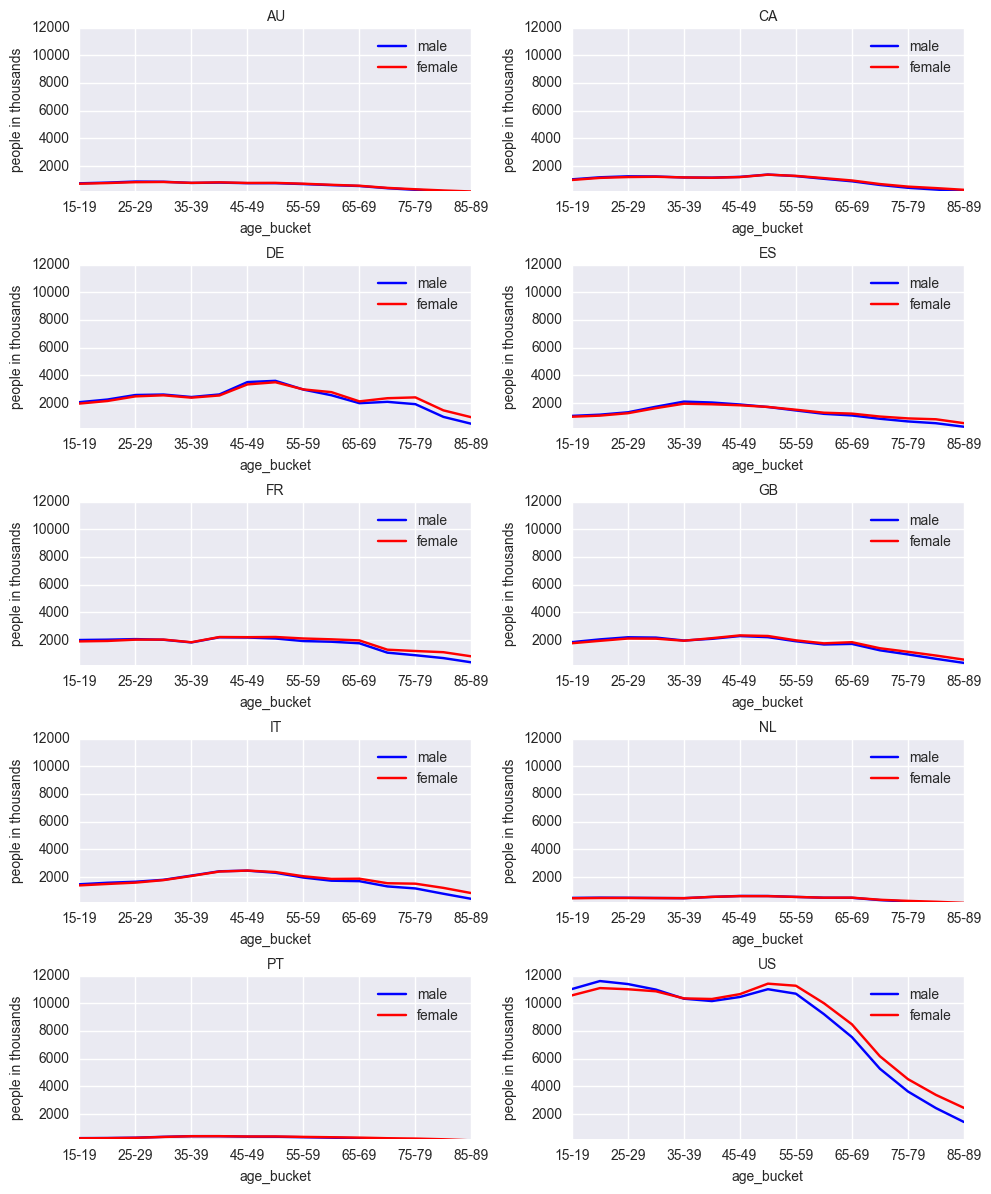

In [18]:
preprocessing_helper.travellerNumberCountryPlot(df_destination_age_male,df_destination_age_female)

Finally, here we see that the most popular country is USA, which makes sense as most travelers are from in the US. Then, far behind, the countries are Germany, followed by France and Great Britain.

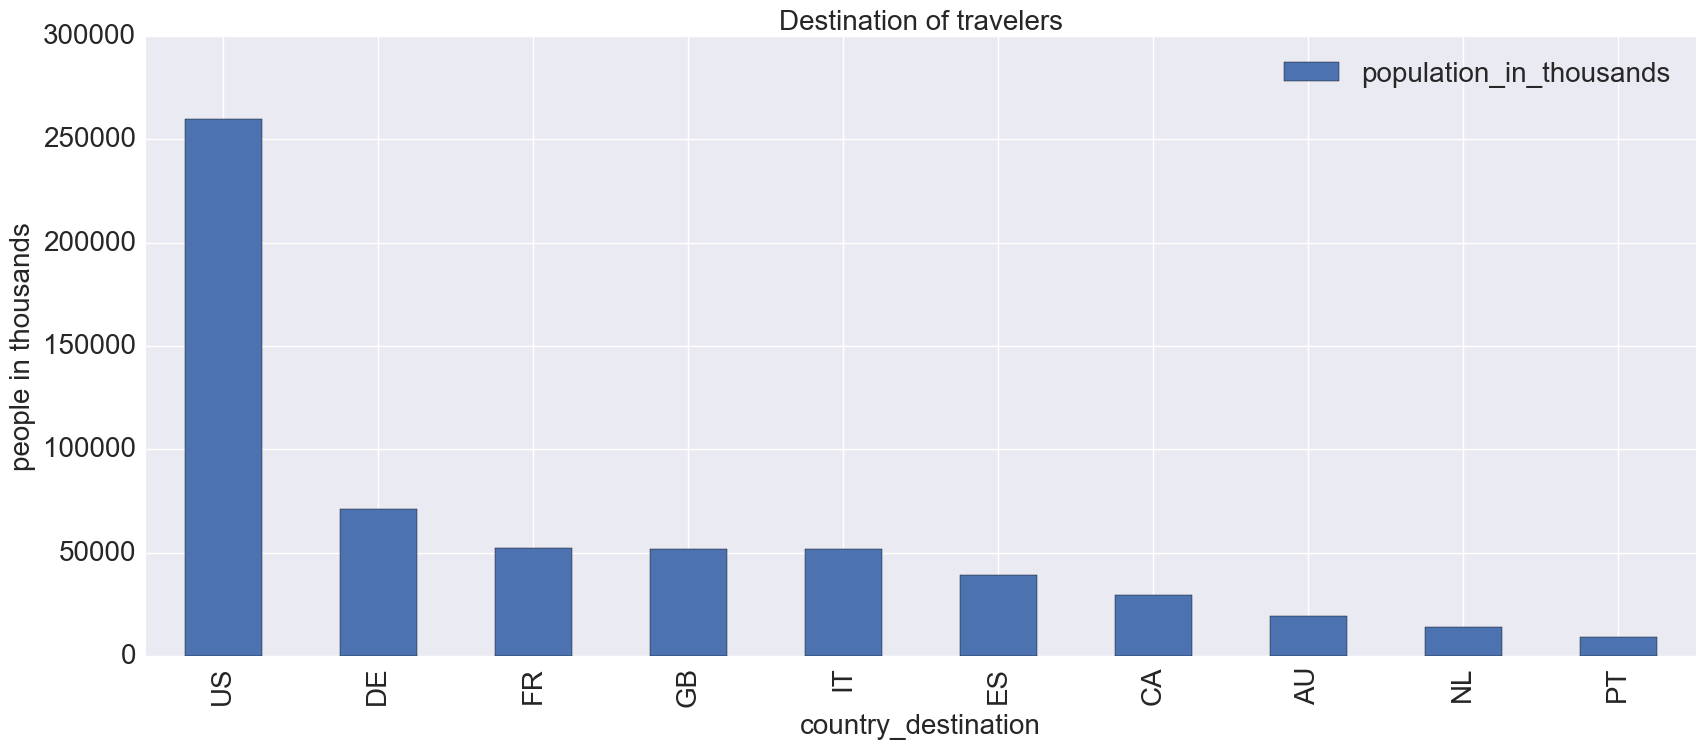

In [19]:
preprocessing_helper.destinationTotalPlot(df_destination_total)

### 1.5 file 'sessions.csv'
*Describe file*

In [20]:

df = pd.read_csv("sessions.csv")
df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


#### NaN users
As we can see, there are some missing user_id. Without a *user_id*, it is impossible to link them with the file *train_user.csv*. We will delete them as we cannot do anything with them.

In [21]:
df.isnull().any()

user_id           True
action            True
action_type       True
action_detail     True
device_type      False
secs_elapsed      True
dtype: bool

In [22]:
df = preprocessing_helper.cleanSubset(df, 'user_id') 

0.33 % have been removed from the original dataframe


#### Invalid session time
If a session time is NaN, there was probably an error during the session, and its data is unusable. Let's remove them

In [23]:
df = preprocessing_helper.cleanSubset(df, 'secs_elapsed') 

1.29 % have been removed from the original dataframe


#### Actions
Some action produce -unknown- for *action_type* and/or *action_detail*. Sometimes they produce NaN. We replace the NaN values with -unknown- for *action_type,action_detail, action*


In [24]:
df = preprocessing_helper.cleanAction(df)

0.0 % have been removed from the original dataframe


There are no more NaN values.

In [25]:
df.isnull().any()

user_id          False
action           False
action_type      False
action_detail    False
device_type      False
secs_elapsed     False
dtype: bool

#### Total number of actions per user
*Expliquer pourquoi c'est important, et pourquoi on crée une feature'*

file saved


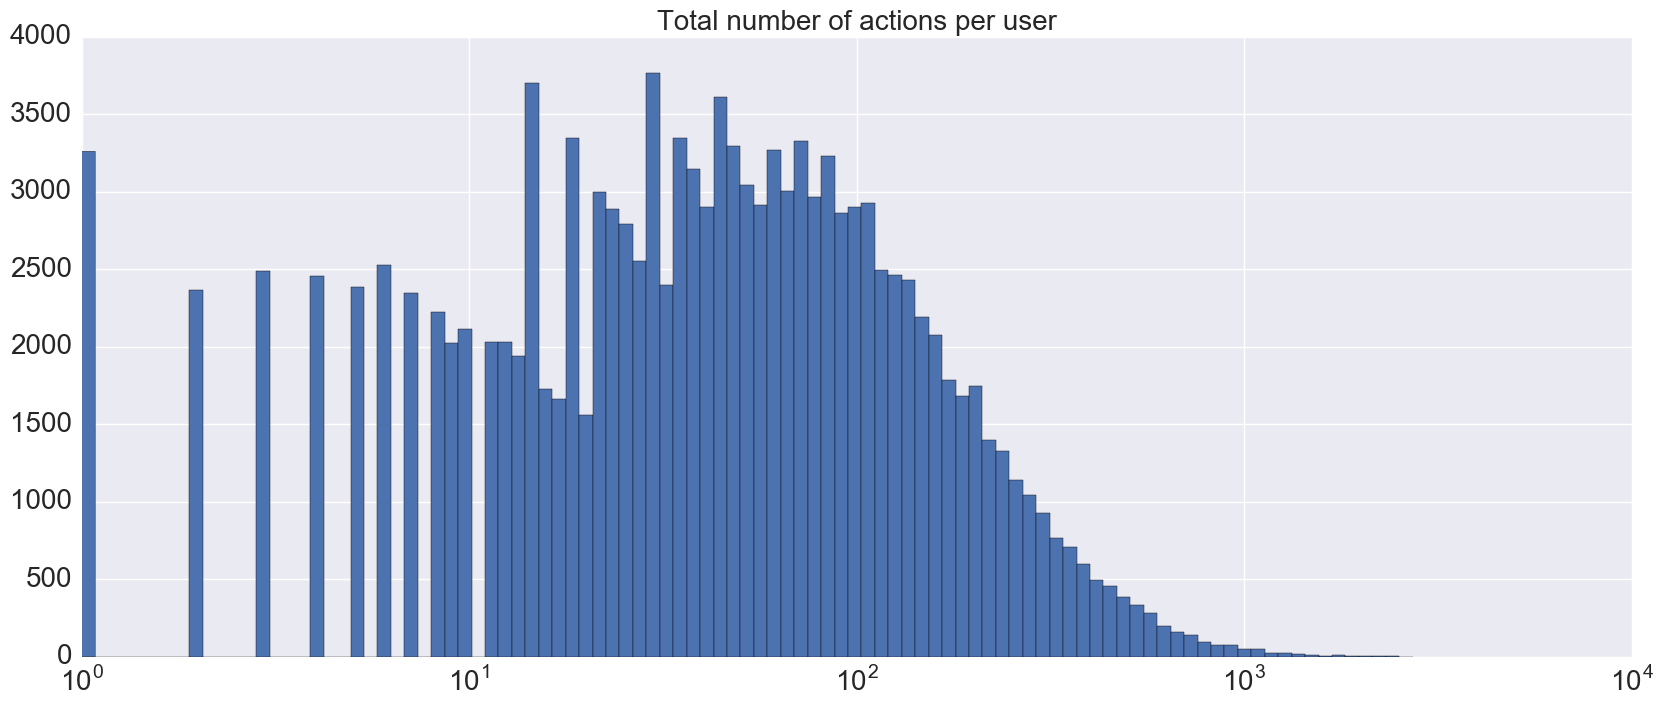

In [26]:
# Get total number of action per user_id
data_session_number_action = preprocessing_helper.createActionFeature(df)

# Save to .csv file
preprocessing_helper.saveFile(data_session_number_action, 'total_action_user_id.csv')

# Plot distribution total number of action per user_id
preprocessing_helper.plotActionFeature(data_session_number_action)

#### Device types
There are 14 devices possible

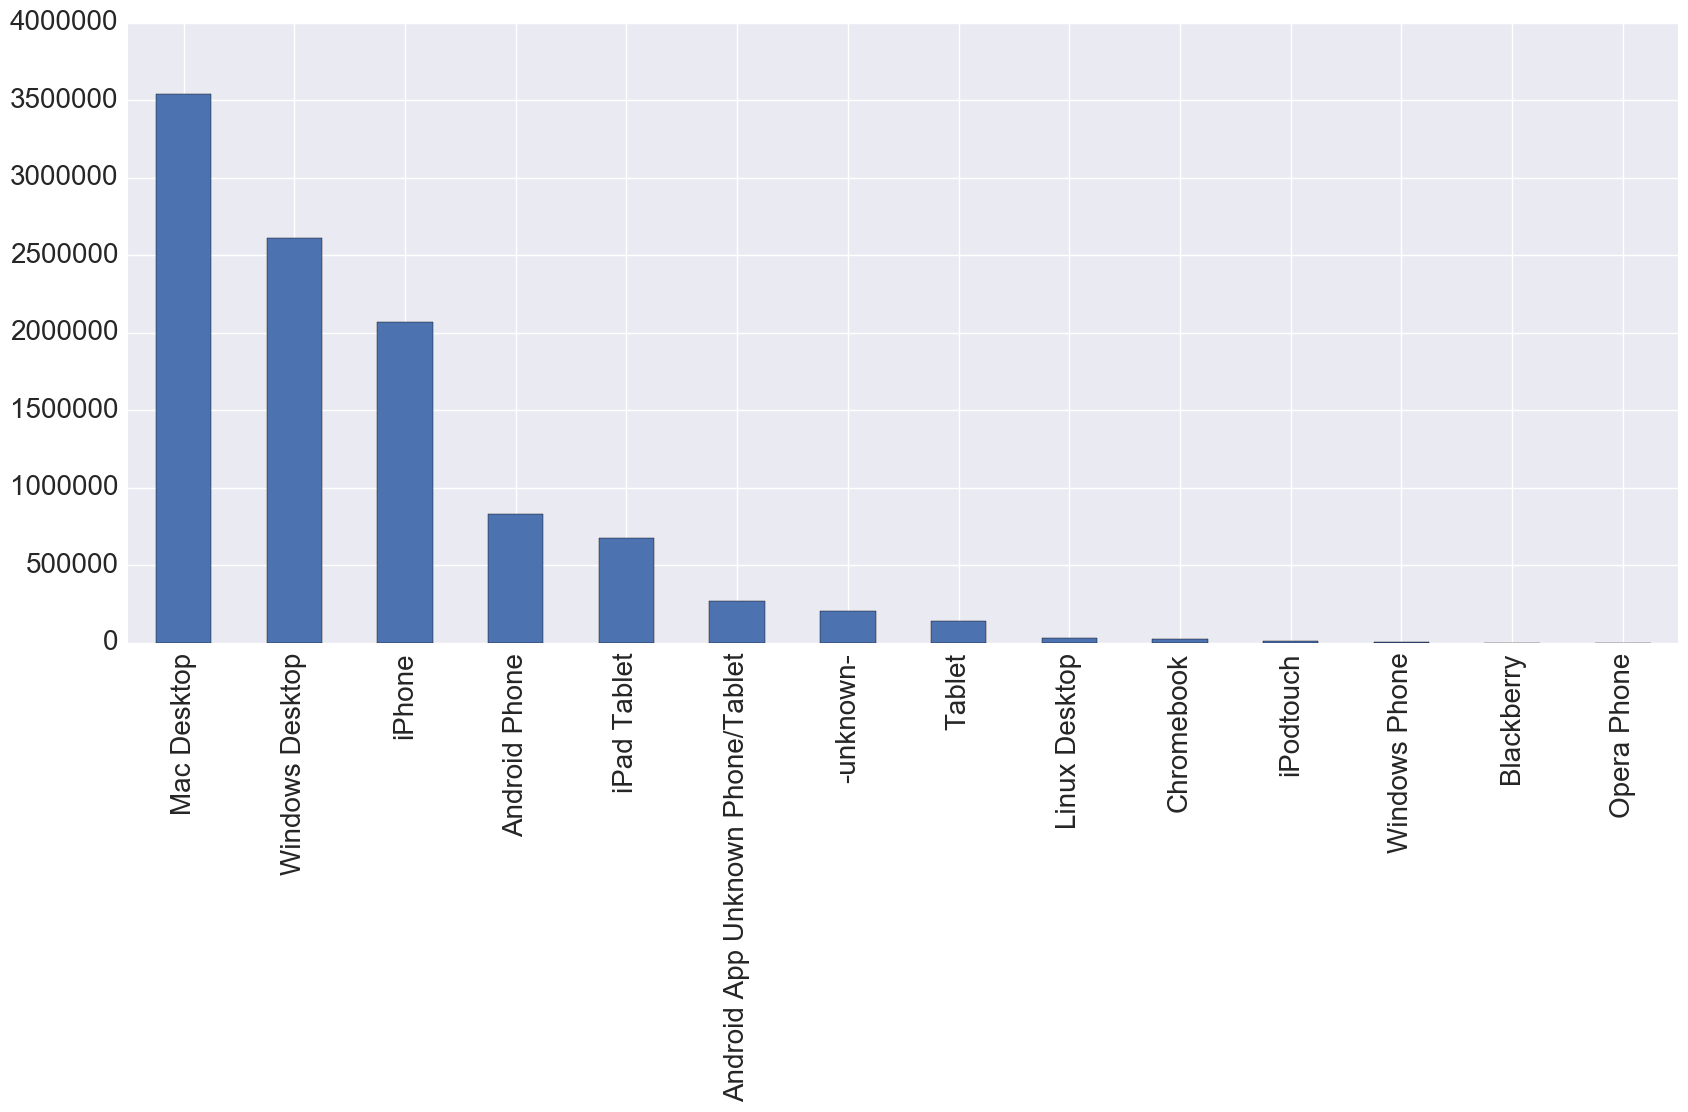

In [27]:
preprocessing_helper.plotHist(df['device_type'])

#### Time spent on average per user
*Expliquer pourquoi c'est important, et pourquoi on crée une feature'*
We display only time > 20s

file saved


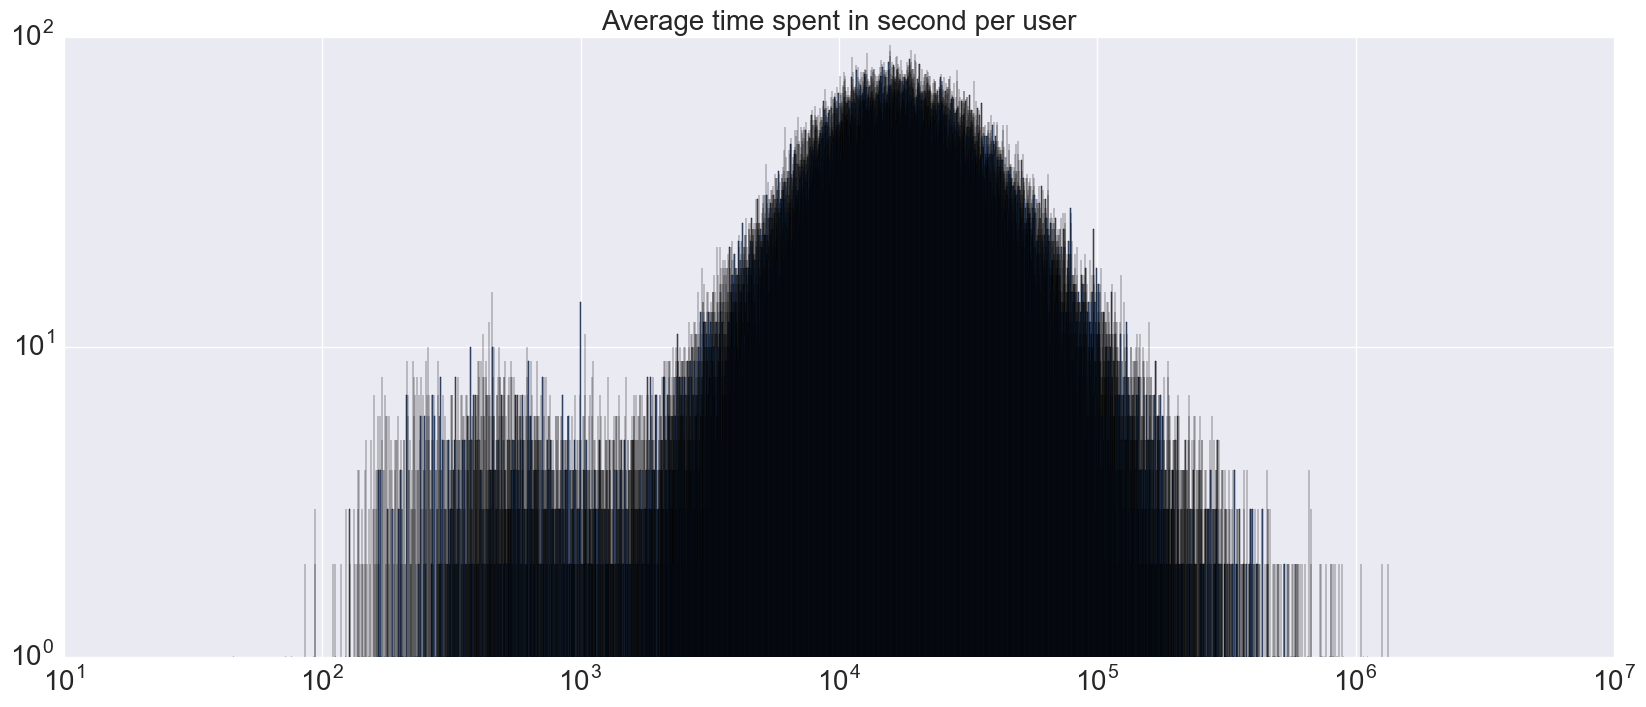

In [28]:
# Get Time spent on average per user_id
data_time_mean = preprocessing_helper.createAverageTimeFeature(df)

# Save to .csv file
data_time_mean_save = pd.DataFrame(data_time_mean)
preprocessing_helper.saveFile(data_time_mean_save, 'time_mean_user_id.csv')

# Plot distribution average time of session per user_id
preprocessing_helper.plotTimeFeature(data_time_mean,'mean')

#### Time spent in total per user
*Expliquer pourquoi c'est important, et pourquoi on crée une feature'*
We display only time > 20s

file saved


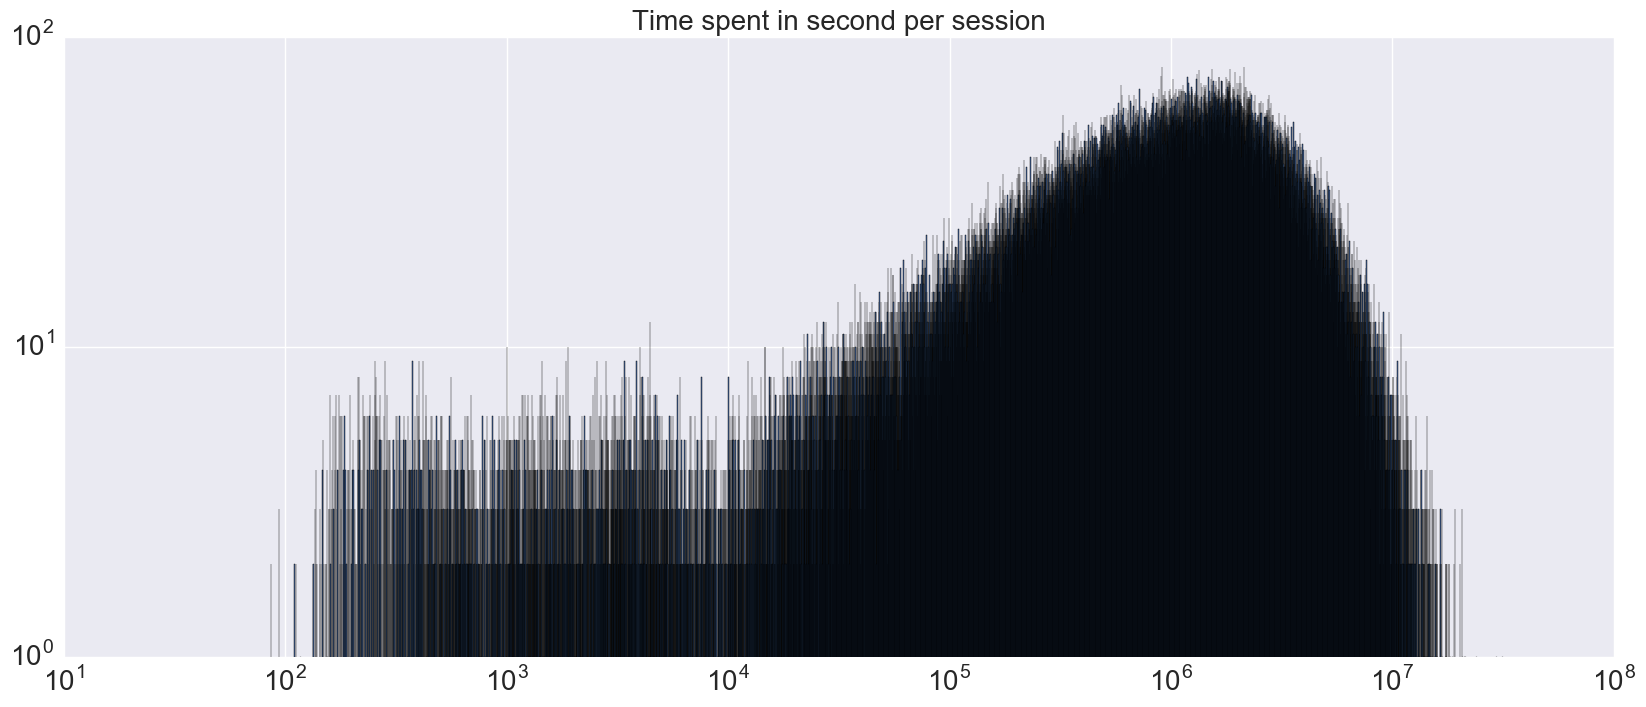

In [29]:
# Get Time spent in total per user_id
data_time_total = preprocessing_helper.createTotalTimeFeature(df)

# Save to .csv file
data_time_total_save = pd.DataFrame(data_time_mean)
preprocessing_helper.saveFile(data_time_total_save, 'time_total_user_id.csv')

# Plot distribution total time of session per user_id
preprocessing_helper.plotTimeFeature(data_time_total,'total')

#### Distribution of time spent
*Expliquer pourquoi c'est important*

We display only time > 20s

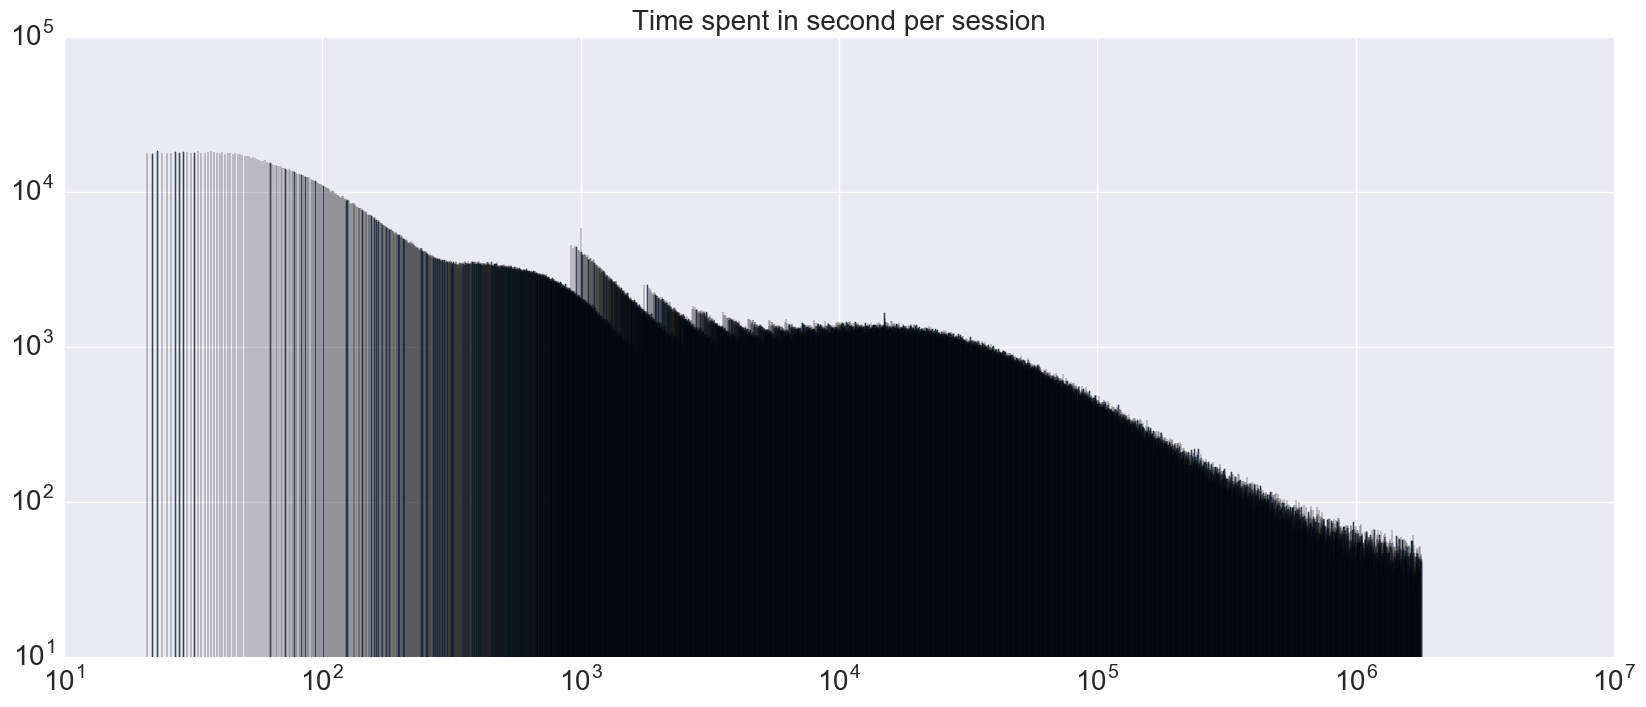

In [30]:
preprocessing_helper.plotTimeFeature(df['secs_elapsed'],'dist')